In [2]:
sys.path.append("../../galaxy_computer_vision_with_EFIGI_data")

In [2]:
# Cross validate and show scores
# using the scikit API for LGBM

from galaxyquest.gbm.GBM import GBM
gbm_model = GBM("../datasets\EFIGI_SIFT_feature_data_2kp_nothreshold.csv", 256)
gbm_model.cross_validate(5)

{'fit_time': array([1.4710722 , 1.38744235, 1.37571239, 1.3140471 , 1.52327204]),
 'score_time': array([0.0283618 , 0.02441359, 0.02148318, 0.02831841, 0.02250481]),
 'test_accuracy': array([0.74327354, 0.74439462, 0.74663677, 0.74298541, 0.74410774]),
 'test_log_loss': array([1.16661623, 1.0981491 , 1.16166758, 1.15683951, 1.19660548])}

Initial training accuracy is ~74% per fold, indicating a model with room for improvement.

[1]	valid_0's multi_logloss: 0.840513
[2]	valid_0's multi_logloss: 0.824348
[3]	valid_0's multi_logloss: 0.817852
[4]	valid_0's multi_logloss: 0.819248
[5]	valid_0's multi_logloss: 0.816941
[6]	valid_0's multi_logloss: 0.813216
[7]	valid_0's multi_logloss: 0.815675
[8]	valid_0's multi_logloss: 0.81391
[9]	valid_0's multi_logloss: 0.815454
[10]	valid_0's multi_logloss: 0.818414
[11]	valid_0's multi_logloss: 0.818144
[12]	valid_0's multi_logloss: 0.819368
[13]	valid_0's multi_logloss: 0.814703
[14]	valid_0's multi_logloss: 0.817473
[15]	valid_0's multi_logloss: 0.821361
[16]	valid_0's multi_logloss: 0.823395
[17]	valid_0's multi_logloss: 0.828826
[18]	valid_0's multi_logloss: 0.830207
[19]	valid_0's multi_logloss: 0.830445
[20]	valid_0's multi_logloss: 0.833414
[21]	valid_0's multi_logloss: 0.832685
[22]	valid_0's multi_logloss: 0.834345
[23]	valid_0's multi_logloss: 0.837268
[24]	valid_0's multi_logloss: 0.837273
[25]	valid_0's multi_logloss: 0.839127
[26]	valid_0's multi_logloss: 0.841

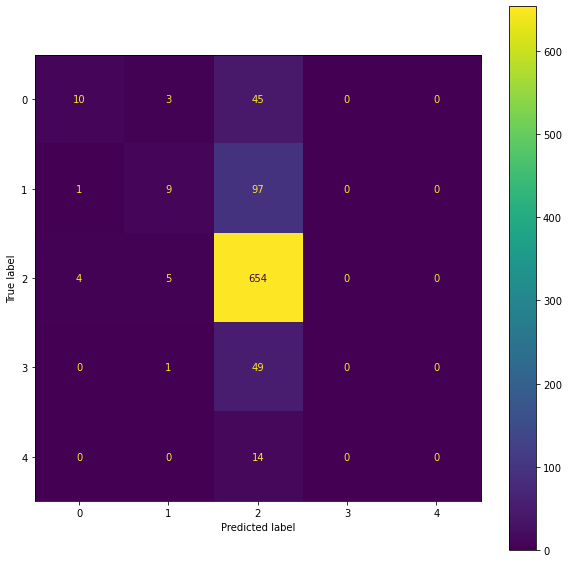

In [7]:
# Use our GBM api to plot a confusion matrix on the non-thresholded data.
from galaxyquest.gbm.GBM import GBM
gbm_model = GBM("../datasets\EFIGI_SIFT_feature_data_2kp_nothreshold.csv", "../datasets\EFIGI_labels.csv", 256)
gbm_model.train(0.2, 0.1)
gbm_model.plot_confusion_matrix()

Log loss goes up during training. Interesting to note. Loss ends up at ~1.2 per the cross validation.

The model is clearly overfitting on the Spirals due to the class imbalance.

In [8]:
# Cross validate and show scores
# using the scikit API for LGBM
from galaxyquest.gbm.GBM import GBM
gbm_model = GBM("../datasets\EFIGI_SIFT_feature_data_2kp_nothreshold.csv", "../datasets\EFIGI_labels.csv", 256)
gbm_model.cross_validate(5)

{'fit_time': array([1.49082279, 1.48685575, 1.36751318, 1.13994265, 1.41355395]),
 'score_time': array([0.02271366, 0.01900005, 0.02300096, 0.01900101, 0.02000022]),
 'test_accuracy': array([0.74327354, 0.74439462, 0.74663677, 0.74298541, 0.74410774]),
 'test_log_loss': array([1.16661623, 1.0981491 , 1.16166758, 1.15683951, 1.19660548])}

[1]	valid_0's multi_logloss: 0.884556
[2]	valid_0's multi_logloss: 0.874231
[3]	valid_0's multi_logloss: 0.865576
[4]	valid_0's multi_logloss: 0.857181
[5]	valid_0's multi_logloss: 0.854618
[6]	valid_0's multi_logloss: 0.855553
[7]	valid_0's multi_logloss: 0.857048
[8]	valid_0's multi_logloss: 0.854772
[9]	valid_0's multi_logloss: 0.855226
[10]	valid_0's multi_logloss: 0.856514
[11]	valid_0's multi_logloss: 0.85518
[12]	valid_0's multi_logloss: 0.851014
[13]	valid_0's multi_logloss: 0.851496
[14]	valid_0's multi_logloss: 0.852592
[15]	valid_0's multi_logloss: 0.848637
[16]	valid_0's multi_logloss: 0.848648
[17]	valid_0's multi_logloss: 0.846294
[18]	valid_0's multi_logloss: 0.850277
[19]	valid_0's multi_logloss: 0.848915
[20]	valid_0's multi_logloss: 0.851021
[21]	valid_0's multi_logloss: 0.851525
[22]	valid_0's multi_logloss: 0.854869
[23]	valid_0's multi_logloss: 0.856055
[24]	valid_0's multi_logloss: 0.859031
[25]	valid_0's multi_logloss: 0.861925
[26]	valid_0's multi_logloss: 0.862

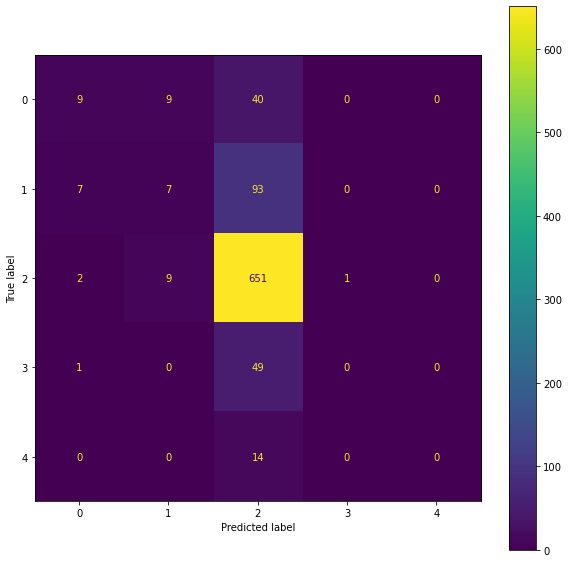

In [9]:
# Use our GBM api to plot a confusion matrix on thethresholded data.
from galaxyquest.gbm.GBM import GBM
gbm_model = GBM("../datasets\EFIGI_SIFT_feature_data_2kp_nothreshold.csv", "../datasets\EFIGI_labels.csv", 256)
gbm_model.train(0.2, 0.1)
gbm_model.plot_confusion_matrix()

In [11]:
from galaxyquest.gbm.GBM import GBM
gbm_model = GBM("../datasets\EFIGI_SIFT_feature_data_2kp_nothreshold.csv", "../datasets\EFIGI_labels.csv", 256)
cv_results = gbm_model.cross_validate_predict(5)

In [13]:
from galaxyquest.utilities.evaluation_methods import get_metrics_by_epoch
metrics = get_metrics_by_epoch(cv_results["predictions"], cv_results["ground_truth_labels"])

../../galaxy_computer_vision_with_EFIGI_data\galaxyquest\utilities\evaluation_methods.py:38: RuntimeWarning: invalid value encountered in longlong_scalars
  recall = tp / (tp + fn)
../../galaxy_computer_vision_with_EFIGI_data\galaxyquest\utilities\evaluation_methods.py:38: RuntimeWarning: invalid value encountered in longlong_scalars
  recall = tp / (tp + fn)
../../galaxy_computer_vision_with_EFIGI_data\galaxyquest\utilities\evaluation_methods.py:38: RuntimeWarning: invalid value encountered in longlong_scalars
  recall = tp / (tp + fn)
../../galaxy_computer_vision_with_EFIGI_data\galaxyquest\utilities\evaluation_methods.py:38: RuntimeWarning: invalid value encountered in longlong_scalars
  recall = tp / (tp + fn)
../../galaxy_computer_vision_with_EFIGI_data\galaxyquest\utilities\evaluation_methods.py:38: RuntimeWarning: invalid value encountered in longlong_scalars
  recall = tp / (tp + fn)
../../galaxy_computer_vision_with_EFIGI_data\galaxyquest\utilities\evaluation_methods.py:38: Ru

In [14]:
metrics

{'epoch_precisions': [[0.08620689655172414,
   0.17543859649122806,
   0.08620689655172414,
   0.10344827586206896,
   0.08620689655172414],
  [0.046296296296296294,
   0.1111111111111111,
   0.08411214953271028,
   0.08411214953271028,
   0.056074766355140186],
  [0.9849170437405732,
   0.9683257918552036,
   0.9834087481146304,
   0.975867269984917,
   0.9834087481146304],
  [0.0, 0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0, 0.0]],
 'epoch_recalls': [[0.45454545454545453,
   0.37037037037037035,
   0.38461538461538464,
   0.35294117647058826,
   0.3125],
  [0.25, 0.32432432432432434, 0.3, 0.36, 0.42857142857142855],
  [0.7584204413472706,
   0.7753623188405797,
   0.767962308598351,
   0.7620730270906949,
   0.7572590011614402],
  [nan, nan, nan, nan, nan],
  [nan, nan, nan, nan, nan]],
 'epoch_f1': [[0.14492753623188406,
   0.23809523809523808,
   0.14084507042253522,
   0.16,
   0.13513513513513514],
  [0.078125,
   0.16551724137931034,
   0.1313868613138686,
   0.13636363636363635,

In [8]:
sorted(["elliptical", "lenticular", "spiral", "irregular", "dwarf_elliptical"])

['dwarf_elliptical', 'elliptical', 'irregular', 'lenticular', 'spiral']

In [ ]:
Labels:

0: Elliptical

1: Lenticular

2: Spiral

3: Irregular

4: Dwarf Spheroid Elliptical

In [7]:
import numpy as np
np.unique(tts_results["predictions"])

array([0, 1, 2], dtype=int64)